<a href="https://colab.research.google.com/github/rypriyanka2005/Machine-Learning-Sem-4/blob/MLlabs/MLLAB31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter A:1 2 3 4 5
enter B:2 3 4 5 6
dot produt by own function: 70.0
dot product by numpy function: 70.0
euclidean norm by own function of A: 7.416198487095663
euclidean norm by numpy function of A: 7.416198487095663
euclidean norm by own function of B: 9.486832980505138
euclidean norm by numpy function of B: 9.486832980505138
mean of each features in data: {0: 0.18230121732691115, 1: 0.04454362804980025, 2: 0.035535619575056736, 3: 0.055095537637434085, 4: 0.13444755411672163, 5: 0.009584255942839548, 6: 0.05988564107625341, 7: -0.014067225530625593, 8: -0.014855062801200584, 9: -0.015558331253783931, 10: 0.011934061666902819, 11: 0.10893454013402315, 12: -0.03548185289081784, 13: 0.23182709822392333, 14: -0.3055707217527441, 15: -0.0949854571104045, 16: 0.2558256670355792, 17: 0.014755792445830692, 18: -0.0022481417201593683, 19: -0.05102219003320369, 20: -0.10729654264682315, 21: -0.1122186508810554, 22: -0.0026497311914416553, 23: -0.003750507974952351, 24: -0.07092395275540447, 25

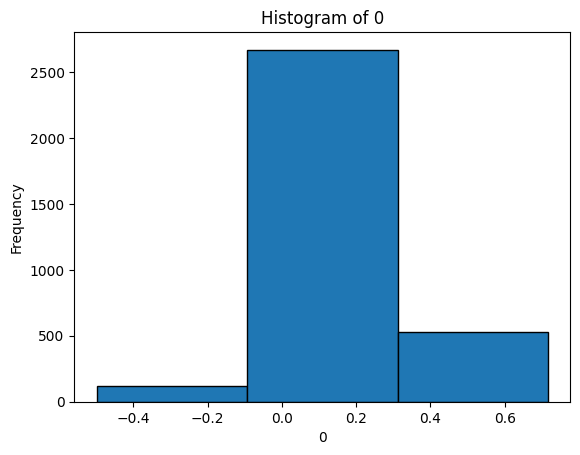

Minkwoski Distance [np.float64(136.88107364440657), np.float64(6.147545026101232), np.float64(2.3668936463431565), np.float64(1.5320631411955767), np.float64(1.2122201244377389), np.float64(1.056286982251742), np.float64(0.9698347699678552), np.float64(0.9179938750137612), np.float64(0.8851775808905121), np.float64(0.8635159985385188)]
Distance (own function): 6.147545026101232
Distance (SciPy): 6.147545026101232
Test Accuracy: 0.4969818913480885
[3 3 2 2 3 2 2 2 3 2 3 1 3 1 3 2 3 3 3 3 2 2 1 2 2 3 2 2 2 2 3 3 3 3 3 3 2
 3 2 3 3 3 3 3 3 3 2 2 3 3 2 3 3 2 3 2 3 3 3 3 3 3 2 3 1 3 2 2 1 1 3 3 2 3
 3 1 2 3 1 2 1 3 3 3 3 2 3 3 3 1 3 2 3 1 2 3 2 3 3 2 1 2 3 2 3 3 2 3 2 3 3
 3 2 3 3 3 2 2 1 3 2 3 1 2 3 3 3 3 3 2 3 3 2 3 2 3 3 2 3 3 1 3 2 2 3 2 2 3
 1 2 3 3 3 1 1 2 3 3 2 3 3 2 3 3 3 2 2 3 2 3 3 3 3 3 3 3 3 3 1 3 1 3 2 3 3
 3 3 1 2 2 2 2 1 3 1 2 3 2 2 2 3 3 3 3 2 3 2 2 2 3 3 3 3 1 1 3 3 1 3 2 3 3
 3 3 2 3 3 3 1 3 3 3 1 3 3 3 3 3 2 2 3 1 2 2 3 2 3 1 3 2 3 3 3 2 3 3 1 1 3
 1 3 2 2 3 2 3 3 3 3 3 1

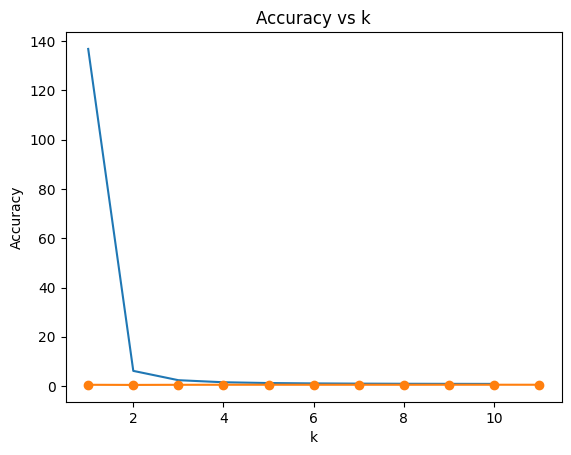

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
kNN handles non-linear data better than matrix inversion, which assumes linear separability.


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#A1
#Write your own functions to evaluate the following for vectors A,B of n dim

def dot_product(A, B):
    total = 0
    for i in range(len(A)):
        total += A[i] * B[i]
    return total

def euclidean_norm(A):
  sum = 0
  for i in range(len(A)):
    sum = sum + A[i]**2
  return sum**0.5

A = np.array(input("enter A:").split(), float)
B = np.array(input("enter B:").split(), float)

dp = dot_product(A,B)
ena = euclidean_norm(A)
enb = euclidean_norm(B)
# dot product and euclidean norm by numpy
dp1 = np.dot(A,B)
ena1 = np.linalg.norm(A)
enb1 = np.linalg.norm(B)

#comparision
print("dot produt by own function:", dp)
print("dot product by numpy function:", dp1)
print("euclidean norm by own function of A:", ena)
print("euclidean norm by numpy function of A:", ena1)
print("euclidean norm by own function of B:", enb)
print("euclidean norm by numpy function of B:", enb1)

#A2
# importing file
df = pd.read_excel("/content/BERT_Embeddings.xlsx", engine="openpyxl")


# mean and var and standard deviation own function
def meanByFormula(data):
  mean = sum(data)/len(data)
  return mean

def varByFormula(data):
  mean = meanByFormula(data)
  total = 0
  for x in data:
    total += (x - mean) ** 2
  var = total / len(data)
  return var

def standardDeviationByFormula(data):
  var = varByFormula(data)
  std = var ** 0.5
  return std

# producing mean, var and std dev for all features ie columns
def dataset_statistics_df(df):
    means = {}
    variances = {}
    stds = {}

    for col in df.columns:
        data = df[col].tolist()
        means[col] = meanByFormula(data)
        variances[col] = varByFormula(data)
        stds[col] = standardDeviationByFormula(data)

    return means, variances, stds


#mean for each class also known as class centroid
def class_centroid(df_class):
    return df_class.mean(axis=0).values

#spread for each class also known as standard deviation
def class_spread(df_class):
    return df_class.std(axis=0).values

# inter class or norm bw mean vectors of a specific class
def interclass_distance(centroid1, centroid2):
    return np.linalg.norm(centroid1 - centroid2)

# dataset_statistics of are data
features = df.drop(columns=["label"])
features = features.select_dtypes(include=["int64", "float64"])
means, variances, stds = dataset_statistics_df(features)
print("mean of each features in data:",means)
print("variance of each feature in data:",variances)
print("standard deviation of each feature in data:",stds)

# separate features and class label and drps it
features = df.drop(columns=["label"])
features = features.select_dtypes(include=["int64", "float64"])
# takes two specific class
class1 = features[df["label"] == 1]
class2 = features[df["label"] == 2]

# centroids
c1 = class_centroid(class1)
c2 = class_centroid(class2)

# spreads
spread1 = class_spread(class1)
spread2 = class_spread(class2)

# distance
dist = interclass_distance(c1, c2)


#A3

# making buckets(data in range)
def histogram_data(num_bins,data):
  count,bin_edges = np.histogram(data,bins=num_bins)
  return count,bin_edges

# ploting a histogram with a feature
def plot_histogram(num_bins,data,feature_name="Feature"):
  count,bin_edges = histogram_data(num_bins,data)
  plt.hist(data,bins=num_bins,edgecolor='black')
  plt.xlabel(feature_name)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {feature_name}")
  plt.show()


num_bins = 5
data =   features.iloc[:, 0]
counts,bin_edges = histogram_data(num_bins,data)
print("Counts in each bucket:", counts)
print("Bucket edges:", bin_edges)
plot_histogram(3, data, feature_name=data.name)


#A4

#calculating minkowski distance
def minkowski_distance(A,B,p):
  sum=0
  for i in range(len(A)):
    sum = sum + abs(A[i]-B[i])**p
  return sum**(1/p)

# ploting graph of minkowski distance where p in range 1 to 10
def plot_graph(list,title):
  p_value = [i for i in range(1,len(list)+1)]
  plt.plot(p_value,list)
  plt.xlabel("p value")
  plt.ylabel("dist")
  plt.title(title)

A = features.iloc[0].values
B = features.iloc[1].values
minkowski_dis = [minkowski_distance(A,B,p) for p in range(1,11)]

print("Minkwoski Distance",minkowski_dis)
plot_graph(minkowski_dis,"Minkowski Distance")




#A5
# comparing minkowski diatance with own fun and fun from scipy

d_own = minkowski_distance(A, B, p=2)  # Euclidean distance
print("Distance (own function):", d_own)

d_scipy = minkowski(A, B, p=2) # Euclidean distance
print("Distance (SciPy):", d_scipy)


#A6
X = features.values
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#A7
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

#A8
accuracy = neigh.score(X_test, y_test)
print("Test Accuracy:", accuracy)
#A9
y_pred = neigh.predict(X_test)
print(y_pred)
test_vect = X_test[0]
print("Predicted class:", neigh.predict([test_vect]))

#A10
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def knn_predict(X_train, y_train, x_test, k):
    distances = []
    for i in range(len(X_train)):
        d = euclidean_distance(X_train[i], x_test)
        distances.append((d, y_train[i]))
    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]
    labels = [label for _, label in neighbors]
    return max(set(labels), key=labels.count)
def confusion_metrics(y_true, y_pred):
    TP = FP = FN = TN = 0
    for t, p in zip(y_true, y_pred):
        if t == 1 and p == 1: TP += 1
        elif t == 0 and p == 1: FP += 1
        elif t == 1 and p == 0: FN += 1
        else: TN += 1
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) else 0
    recall = TP / (TP + FN) if (TP + FN) else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) else 0
    return accuracy, precision, recall, f1


own_preds = [knn_predict(X_train, y_train, x, 3) for x in X_test]
print("Own kNN accuracy:", confusion_metrics(y_test, own_preds)[0])
#A11
k_vals = range(1, 12)
accs = []
for k in k_vals:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    accs.append(clf.score(X_test, y_test))

plt.plot(k_vals, accs, marker='o')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()
#A12
acc, prec, rec, f1 = confusion_metrics(y_test,y_pred)
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
#A13

#A14
print("kNN handles non-linear data better than matrix inversion, which assumes linear separability.")